# HW 3 - Jingwen Li

In [1]:
from scipy.optimize import fsolve, root_scalar
from scipy.stats import norm, multivariate_normal, rv_continuous
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.integrate import quad
import warnings
warnings.filterwarnings("ignore")

## Q1

In [2]:
def pdf_dr(x):
    return 2 - 2 * x

def lgd(x):
    return x**0.5

def pdf_lgd(x):
    return 4 * x - 4 * x**3

In [3]:
x = np.linspace(0, 1, 1000)
PDF_dr = pdf_dr(x)
lgd_dr = lgd(x)
PDF_lgd = pdf_lgd(x)

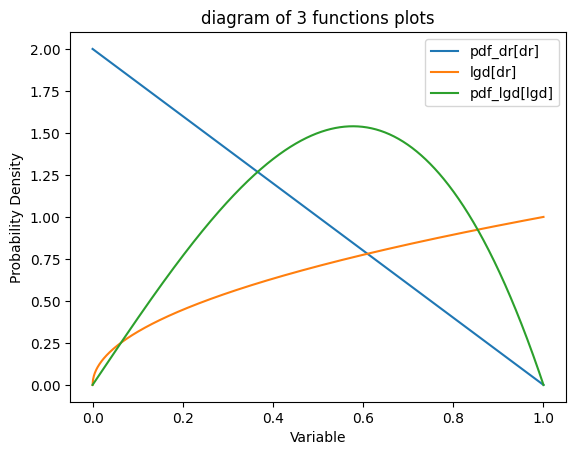

In [4]:
# Create the plot
plt.plot(x, PDF_dr, label='pdf_dr[dr]')
plt.plot(x, lgd_dr, label='lgd[dr]')
plt.plot(x, PDF_lgd, label='pdf_lgd[lgd]')

# Add labels and legend
plt.xlabel('Variable')
plt.ylabel('Probability Density')
plt.title('diagram of 3 functions plots')
plt.legend()

# Display the plot
plt.show()


## Q2

In [5]:
def pdf_loss(x):
    return 4/3 * x ** (-1/3) - 4/3 * x **(1/3)

In [6]:
PDF_loss = pdf_loss(x)

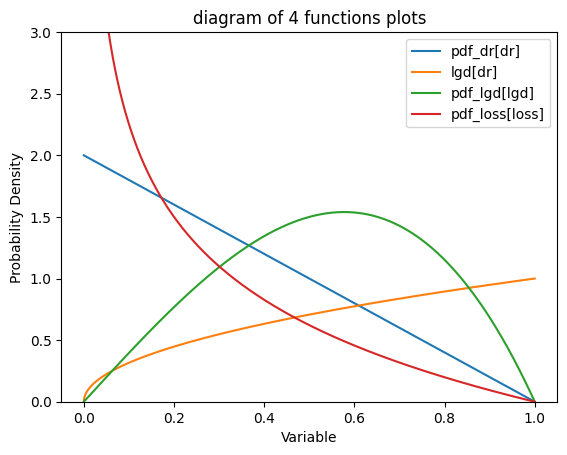

In [7]:
# Create the plot
plt.plot(x, PDF_dr, label='pdf_dr[dr]')
plt.plot(x, lgd_dr, label='lgd[dr]')
plt.plot(x, PDF_lgd, label='pdf_lgd[lgd]')
plt.plot(x, PDF_loss, label='pdf_loss[loss]')

# Add labels and legend
plt.xlabel('Variable')
plt.ylim([0,3])
plt.ylabel('Probability Density')
plt.title('diagram of 4 functions plots')
plt.legend()

# Display the plot
plt.show()

## Q3

In [34]:
def vasicek_density(prob, correlation, val):
    constant = np.sqrt(1 - correlation) / (np.sqrt(correlation) * norm.cdf(norm.ppf(val)))
    return constant * norm.cdf((np.sqrt(1 - correlation) * norm.ppf(val) - norm.ppf(prob)) / (np.sqrt(correlation)))

def calc_std_dev(prob, correlation):
    return quad(lambda v: (v**2) * vasicek_density(prob, correlation, v), 0, 1)[0]

def avg_vasicek(prob, correlation):
    return quad(lambda v: v * vasicek_density(prob, correlation, v), 0, 1)[0]

In [35]:
PD = 0.1
correlations = np.linspace(0.05, 0.95, num=100)
std_devs = []

In [36]:
df = pd.DataFrame()
correlations = np.linspace(.05, .95, num=100, endpoint=True)
for corr in correlations:
    df.loc[corr, 'Default'] = np.sqrt(calc_std_dev(PD, corr))
df

,Default
0.050000,1.467706
0.059091,1.404075
0.068182,1.351236
0.077273,1.306196
0.086364,1.267031
...,...
0.913636,0.377896
0.922727,0.366318
0.931818,0.353849
0.940909,0.340261


<AxesSubplot: >

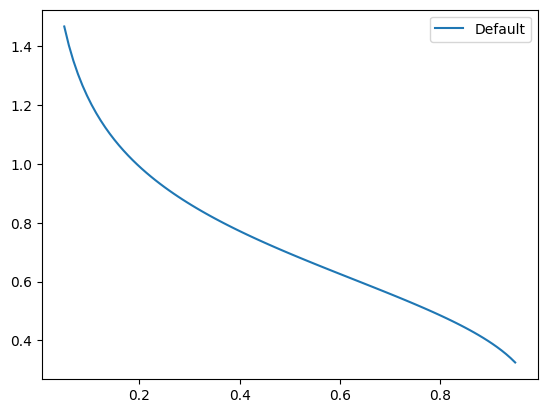

In [38]:
df.plot()

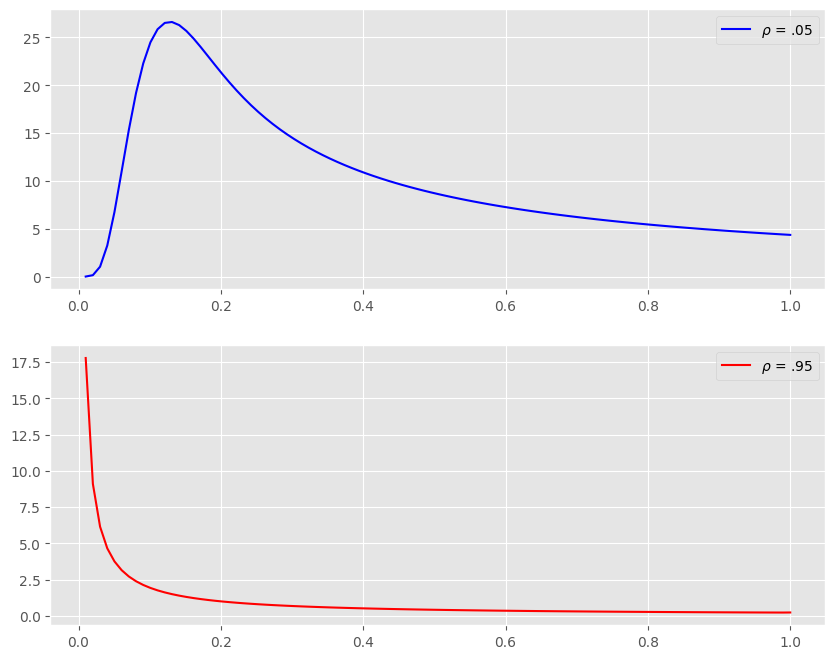

In [44]:
boundary_values = np.linspace(0, 1, num=100)
fig, subplots = plt.subplots(2, 1, figsize=(10, 8))

plt.style.use('ggplot')

subplots[0].plot(boundary_values, vasicek_density(.1, .05, boundary_values), color='blue', label=r'$\rho$ = .05')
subplots[0].legend(loc='best')

subplots[1].plot(boundary_values, vasicek_density(.1, .95, boundary_values), color='red', label=r'$\rho$ = .95')
subplots[1].legend(loc='best')

plt.show()


## Q4

In [51]:
pd1, rho1 = 0.06, 0.06
pd2, rho2 = 0.03, 0.20

In [52]:
def inv_cdf(pd, q, rho):
    return norm.cdf((norm.ppf(pd) + np.sqrt(rho)*norm.ppf(q))/np.sqrt(1-rho))

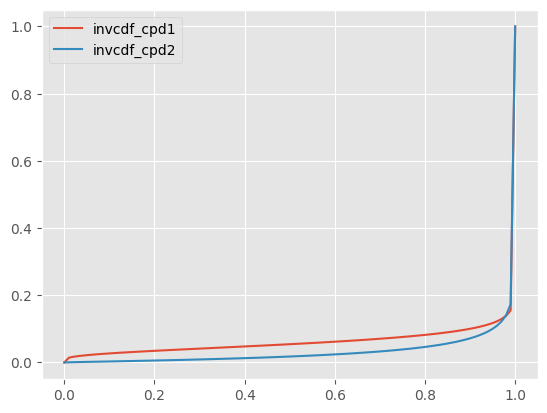

In [53]:
#plot the invcdf_cpd1 and invcdf_cpd2 for q from 0 to 1
q = np.linspace(0,1,100)
plt.plot(q, inv_cdf(pd1, q, rho1))
plt.plot(q, inv_cdf(pd2, q, rho2))
plt.legend(['invcdf_cpd1', 'invcdf_cpd2'])
plt.show()

In [54]:
# q at which cPD1 = cPD2
numerator = (norm.ppf(pd1)/np.sqrt(1-rho1) - norm.ppf(pd2)/np.sqrt(1-rho2))
denominator = (np.sqrt(rho2)/np.sqrt(1-rho2) - np.sqrt(rho1)/np.sqrt(1-rho1))
q = norm.cdf(numerator/denominator)

print(f"q = {q:.2f}") 

q = 0.98
